In [1]:
#add auto reload for src function testing
%load_ext autoreload
%autoreload 2

#let's add the project directory to our module path
import os
import sys

module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
    
    
#also import all of our modules
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from src import data_cleaning

#and here is our data directiory
data_folder = '../../data/'

In [2]:
sales = pd.read_csv(data_folder+'EXTR_RPSale_final.csv',dtype={'Major': 'string', 'Minor':'string', 'PIN': 'string'})
parcels = pd.read_csv(data_folder+'EXTR_Parcel_final.csv',dtype={'Major': 'string', 'Minor':'string', 'PIN': 'string'})
res_bldg = pd.read_csv(data_folder+'EXTR_ResBldg_final.csv', dtype={'Major':'string', 'Minor':'string', 'PIN':'string'})

In [3]:
z = np.abs(stats.zscore(sales.SalePrice))
new_sales = sales[z < 3]

new_sales

,Unnamed: 0,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,...,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning,PIN
0,0,3027422,213043,0120,2019-12-20,560000,20191226000848,,,,...,6,3,N,N,N,N,1,8,,2130430120
1,1,3002257,940652,0630,2019-07-22,435000,20190730001339,,,,...,6,3,N,N,N,N,1,8,,9406520630
2,2,2993601,140281,0020,2019-06-04,450000,20190614000489,,,,...,6,3,N,N,N,N,1,8,,1402810020
3,3,3015264,124550,0098,2019-09-27,193000,20191015000395,,,,...,6,15,N,N,N,N,18,8,18 51 52,1245500098
4,4,2980648,797320,2320,2019-03-27,540000,,,,,...,6,3,N,N,N,N,1,8,,7973202320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29553,29553,2972689,929085,0760,2019-01-25,1205000,20190206001611,,,,...,6,24,N,N,N,N,18,8,12,9290850760
29554,29554,2992593,405940,0095,2019-05-21,442000,20190607001670,,,,...,6,3,N,N,N,N,1,8,,4059400095
29555,29555,3003079,381670,0025,2019-07-22,680000,20190802000628,,,,...,6,3,N,N,N,N,1,8,,3816700025
29556,29556,3025068,615020,0505,2019-11-18,745000,20191212000602,,,,...,6,3,N,N,N,N,1,8,,6150200505


In [4]:
only_sales = sales[(sales['SaleReason']==1)|(sales['SaleReason']==18)]
only_sales

,Unnamed: 0,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,...,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning,PIN
0,0,3027422,213043,0120,2019-12-20,560000,20191226000848,,,,...,6,3,N,N,N,N,1,8,,2130430120
1,1,3002257,940652,0630,2019-07-22,435000,20190730001339,,,,...,6,3,N,N,N,N,1,8,,9406520630
2,2,2993601,140281,0020,2019-06-04,450000,20190614000489,,,,...,6,3,N,N,N,N,1,8,,1402810020
3,3,3015264,124550,0098,2019-09-27,193000,20191015000395,,,,...,6,15,N,N,N,N,18,8,18 51 52,1245500098
4,4,2980648,797320,2320,2019-03-27,540000,,,,,...,6,3,N,N,N,N,1,8,,7973202320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29553,29553,2972689,929085,0760,2019-01-25,1205000,20190206001611,,,,...,6,24,N,N,N,N,18,8,12,9290850760
29554,29554,2992593,405940,0095,2019-05-21,442000,20190607001670,,,,...,6,3,N,N,N,N,1,8,,4059400095
29555,29555,3003079,381670,0025,2019-07-22,680000,20190802000628,,,,...,6,3,N,N,N,N,1,8,,3816700025
29556,29556,3025068,615020,0505,2019-11-18,745000,20191212000602,,,,...,6,3,N,N,N,N,1,8,,6150200505


In [5]:
res_sales= only_sales[(only_sales['PropertyClass'] == 7)|(only_sales['PropertyClass'] == 8)]
res_sales

,Unnamed: 0,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,...,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning,PIN
0,0,3027422,213043,0120,2019-12-20,560000,20191226000848,,,,...,6,3,N,N,N,N,1,8,,2130430120
1,1,3002257,940652,0630,2019-07-22,435000,20190730001339,,,,...,6,3,N,N,N,N,1,8,,9406520630
2,2,2993601,140281,0020,2019-06-04,450000,20190614000489,,,,...,6,3,N,N,N,N,1,8,,1402810020
3,3,3015264,124550,0098,2019-09-27,193000,20191015000395,,,,...,6,15,N,N,N,N,18,8,18 51 52,1245500098
4,4,2980648,797320,2320,2019-03-27,540000,,,,,...,6,3,N,N,N,N,1,8,,7973202320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29553,29553,2972689,929085,0760,2019-01-25,1205000,20190206001611,,,,...,6,24,N,N,N,N,18,8,12,9290850760
29554,29554,2992593,405940,0095,2019-05-21,442000,20190607001670,,,,...,6,3,N,N,N,N,1,8,,4059400095
29555,29555,3003079,381670,0025,2019-07-22,680000,20190802000628,,,,...,6,3,N,N,N,N,1,8,,3816700025
29556,29556,3025068,615020,0505,2019-11-18,745000,20191212000602,,,,...,6,3,N,N,N,N,1,8,,6150200505


In [6]:
no_zeros = res_sales[res_sales['SalePrice']!=0]
no_zeros

,Unnamed: 0,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,...,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning,PIN
0,0,3027422,213043,0120,2019-12-20,560000,20191226000848,,,,...,6,3,N,N,N,N,1,8,,2130430120
1,1,3002257,940652,0630,2019-07-22,435000,20190730001339,,,,...,6,3,N,N,N,N,1,8,,9406520630
2,2,2993601,140281,0020,2019-06-04,450000,20190614000489,,,,...,6,3,N,N,N,N,1,8,,1402810020
3,3,3015264,124550,0098,2019-09-27,193000,20191015000395,,,,...,6,15,N,N,N,N,18,8,18 51 52,1245500098
4,4,2980648,797320,2320,2019-03-27,540000,,,,,...,6,3,N,N,N,N,1,8,,7973202320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29553,29553,2972689,929085,0760,2019-01-25,1205000,20190206001611,,,,...,6,24,N,N,N,N,18,8,12,9290850760
29554,29554,2992593,405940,0095,2019-05-21,442000,20190607001670,,,,...,6,3,N,N,N,N,1,8,,4059400095
29555,29555,3003079,381670,0025,2019-07-22,680000,20190802000628,,,,...,6,3,N,N,N,N,1,8,,3816700025
29556,29556,3025068,615020,0505,2019-11-18,745000,20191212000602,,,,...,6,3,N,N,N,N,1,8,,6150200505


In [7]:
z = np.abs(stats.zscore(no_zeros.SalePrice))
no_outliers = no_zeros[z < 3]

no_outliers

,Unnamed: 0,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,...,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning,PIN
0,0,3027422,213043,0120,2019-12-20,560000,20191226000848,,,,...,6,3,N,N,N,N,1,8,,2130430120
1,1,3002257,940652,0630,2019-07-22,435000,20190730001339,,,,...,6,3,N,N,N,N,1,8,,9406520630
2,2,2993601,140281,0020,2019-06-04,450000,20190614000489,,,,...,6,3,N,N,N,N,1,8,,1402810020
3,3,3015264,124550,0098,2019-09-27,193000,20191015000395,,,,...,6,15,N,N,N,N,18,8,18 51 52,1245500098
4,4,2980648,797320,2320,2019-03-27,540000,,,,,...,6,3,N,N,N,N,1,8,,7973202320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29553,29553,2972689,929085,0760,2019-01-25,1205000,20190206001611,,,,...,6,24,N,N,N,N,18,8,12,9290850760
29554,29554,2992593,405940,0095,2019-05-21,442000,20190607001670,,,,...,6,3,N,N,N,N,1,8,,4059400095
29555,29555,3003079,381670,0025,2019-07-22,680000,20190802000628,,,,...,6,3,N,N,N,N,1,8,,3816700025
29556,29556,3025068,615020,0505,2019-11-18,745000,20191212000602,,,,...,6,3,N,N,N,N,1,8,,6150200505


In [4]:
cor_df = pd.merge(new_sales, res_bldg, on='PIN', how='inner', suffixes=('_sales', '_res'))

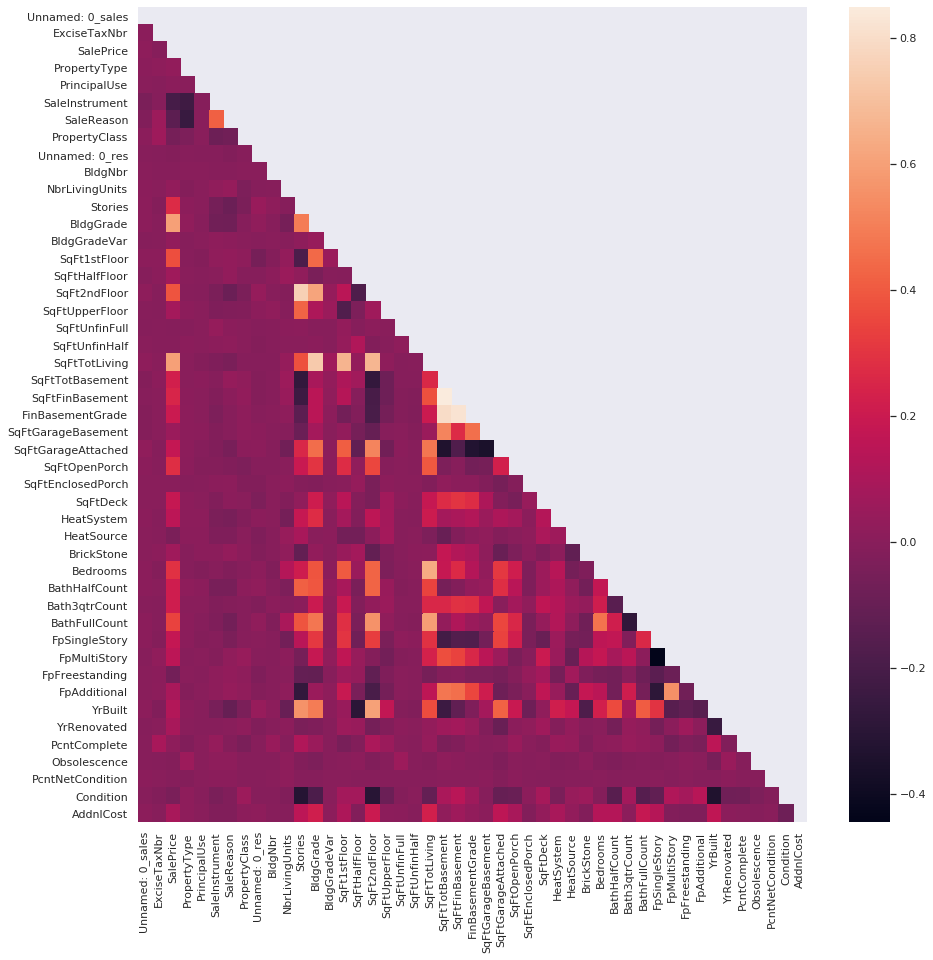

In [5]:
sns.set(rc={'figure.figsize':(15, 15)})
mask = np.triu(np.ones_like(cor_df.corr(), dtype=np.bool))
sns.heatmap(cor_df.corr(), mask=mask);
corrMatrix = cor_df.corr()

In [6]:
fsm_df = cor_df.loc[:, ['SalePrice', 'SqFtTotLiving']]
fsm_df

,SalePrice,SqFtTotLiving
0,560000,1930
1,435000,1975
2,450000,1080
3,193000,1760
4,540000,1240
...,...,...
29372,1205000,2880
29373,442000,1430
29374,680000,2270
29375,745000,2250


In [7]:
from src import cm_functions

In [8]:
fsm = cm_functions.get_fsm(fsm_df)

Rsquared: 0.36120458459035787
BETA values:
Intercept        57136.807501
SqFtTotLiving      324.377612
dtype: float64
------------------------------------
 
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                 1.661e+04
Date:                Wed, 17 Jun 2020   Prob (F-statistic):               0.00
Time:                        15:55:37   Log-Likelihood:            -4.2167e+05
No. Observations:               29377   AIC:                         8.433e+05
Df Residuals:                   29375   BIC:                         8.434e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P

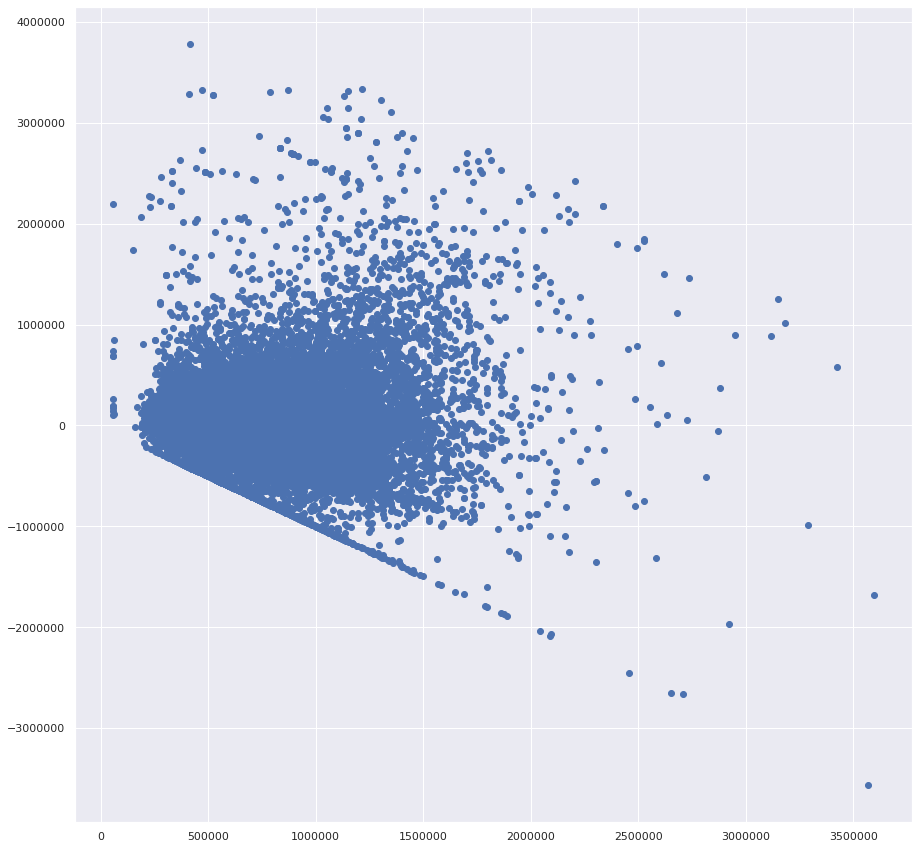

In [9]:
cm_functions.lr_homoscad(fsm)

In [10]:
cm_functions.lr_linear(fsm)

Rainbow statistic: 0.9988592756413659
Rainbow p-value: 0.5275697326182707


(0.9988592756413659, 0.5275697326182707)

0       -123185.597989
1       -262782.590514
2         42535.371915
3       -435041.404008
4         80634.954051
             ...      
29372    213655.670941
29373    -78996.792163
29374   -113473.985951
29375    -41986.433718
29376    307495.939292
Length: 29377, dtype: float64

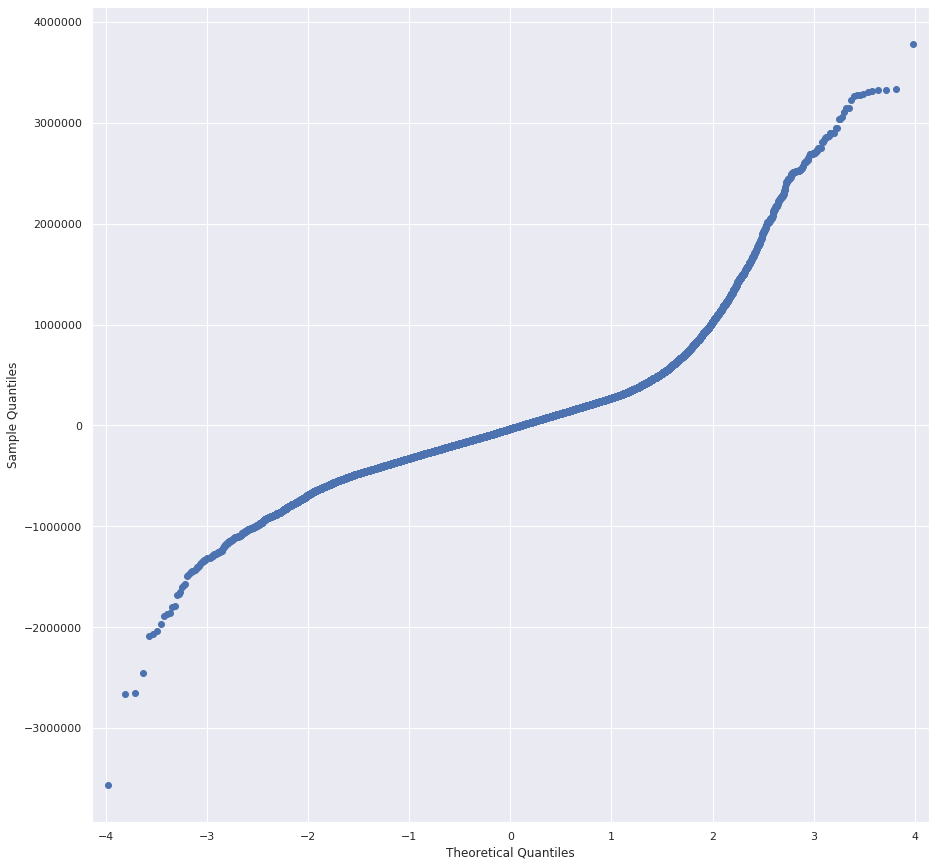

In [11]:
cm_functions.lr_normality(fsm)